In [9]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import pandas as pd
import numpy as np
from numpy.random import random

import math
from time import time
from tqdm.notebook import tqdm

In [2]:
import generators_discrete as g_d
import generators_continuous as g_c

# Task1

## Task 1.1  Bernoulli random number generator

In [5]:
g_d.bernrnd(0.5, 2, 3, 4)

array([[[ True,  True, False,  True],
        [False, False, False,  True],
        [False, False,  True, False]],

       [[False, False, False,  True],
        [ True,  True, False, False],
        [False, False,  True, False]]])

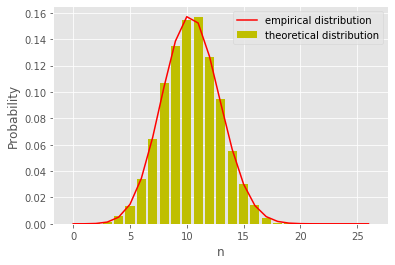

In [4]:
niter = int(1e4)
n = 26
p = 0.4 
X = np.arange(0, n+1)
P_emp = np.zeros(n + 1)
for k in range(niter):
    i = g_d.binrnd(n, p)
    P_emp[i] += 1


P_th = np.zeros(n+1)
P_th[0] = (1 - p) ** n
P_th[n] = P_th[0] 
for k in range(n):
#     P_th(k + 1) = P(X = k)
   P_th[k + 1] =  P_th[k] * (n - k) * p / (k + 1) / (1 - p)


# visualize
plt.bar(X, P_emp / niter, color='y');
plt.plot(X, P_th, color='r')
plt.legend(['empirical distribution', 'theoretical distribution'])
plt.xlabel('n'); plt.ylabel('Probability');

## Task 1.2 Geometry random number generator

$X \sim Geom(p)$, где $p$ - вероятность успеха, тогда  
$\mathbb{P}(X = n) = q^n p, \ n=0,1,\dots$  
$F(n) = \mathbb{P}(X \leq n) = 1 - q^{\lfloor n \rfloor + 1}$

Мы знаем, что $X$ показывает число неудач до первого успеха.

  
  
Найдем такую точку $x_{max}$, до которой лежат больше $\alpha*100 \%$ наблюдений: $F(x_{max}) \geq 1 - \alpha$  
$ 1 - q^{\lfloor x_{max} \rfloor + 1} \geq 1 - \alpha$  
$ \log_q \dfrac{\alpha}{q} \leq \lfloor x_{max} \rfloor$  
$ x_{max} = \lceil \dfrac{\log(\alpha)}{\log(q)} - 1 \rceil$  




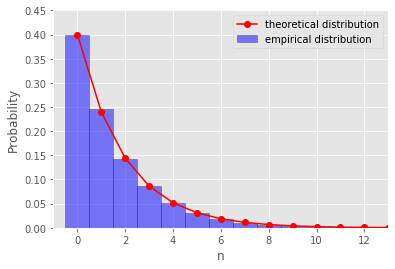

In [42]:
niter = int(1e4)
p = 0.4
# Y_emp = geomrnd1(p, niter);
# np.histogram(Y_emp, 'Facecolor', 'y', 'Normalization', 'probability');

Y_emp = g_d.geomrnd(p, niter)

xmax = math.ceil(np.log(1e-3) / np.log(1-p) - 1)
Y_th = np.cumprod(np.hstack((p, (1-p) * np.ones(xmax))))

edges = np.linspace(-0.5, xmax-0.5, xmax+1)
plt.hist(Y_emp, bins=edges, density=True, 
         color='blue', edgecolor='black', alpha=0.5, label='empirical distribution')
plt.plot(np.arange(xmax+1), Y_th, 'r-o', label='theoretical distribution')
plt.legend()
plt.xlabel('n'); plt.ylabel('Probability');
plt.xlim([-1, xmax])
plt.ylim([0, p + 0.05]);

Проверка свойства отсутствия памяти $\mathbb{P}(X > m+n| X \geq n) = \mathbb{P}(X > m)$  
То есть если $X \sim Geom(p)$, то $Y = (X|X\geq n)-n  \sim X$

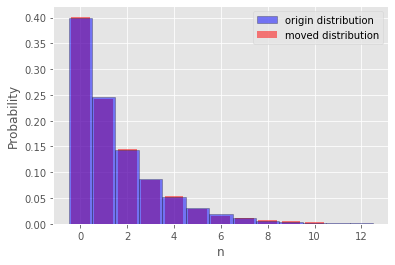

In [43]:
# invariente to move
m = 2
plt.figure()
N,_ = np.histogram(Y_emp, bins=edges)
N_m = N[m:]
plt.bar(np.arange(len(N_m)), N_m / sum(N_m), color='r', alpha=0.5, label='moved distribution')

plt.hist(Y_emp, bins=edges, density=True, 
         color='blue', edgecolor='black', alpha=0.5, label='origin distribution')
plt.legend()
plt.xlabel('n'); plt.ylabel('Probability');

## Task 1.3 Орлянка

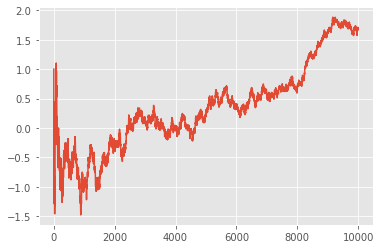

In [6]:
n = int(1e4)
S = np.cumsum(2 * (g_d.bernrnd(0.5, n) - 0.5))
X = np.arange(1, n+1)

Y = S / np.sqrt(X)
plt.plot(X, Y);

# Task 2 Singular distribution
## Task 2.1


In [7]:
def kolmcriterion(X, F, alpha):
    I = np.argsort(X)
    n = len(X)
    F_n = I / n
    diff = np.vstack((F - F_n, F - (F_n - 1/n)))
    D_n = np.max(np.abs(diff))

#     p = 1 - kolmcdf(np.sqrt(n) * D_n)
#     reject = p < alpha;
    K_alpha = np.sqrt(-np.log(alpha/2) / 2)
    reject = np.sqrt(n) * D_n > K_alpha
    return reject


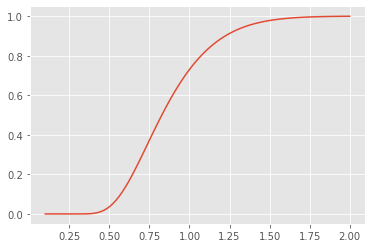

In [8]:
# check g.kolmcdf
n = 100
X = np.linspace(0.1 ,2, n)
F = np.zeros(n)
for i in range(n):
    F[i] = g_d.kolmcdf(X[i])

plt.plot(X, F);

not enought proof to reject hypothesis


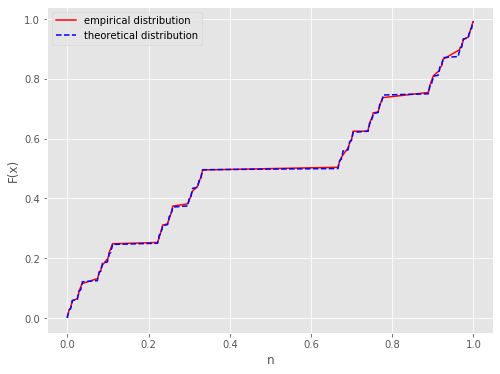

In [9]:
n = int(1e2)
X_emp, F_emp = g_d.cantrnd(n)
I = np.argsort(X_emp)
F_emp = F_emp[I]
X_emp = X_emp[I]


m=8; maxrow = 2**m;
A = np.zeros((maxrow, m))
part = maxrow / 2
for col in range(m):
    for row in range(maxrow):
        A[row, col] = math.floor((row - 1) / part) % 2
    part /= 2

deg = -np.arange(1, m+1).reshape(-1, 1)
X_th = 2 * A @ (3. ** deg)
F_th = A @ (2. ** deg)

# visualize
plt.figure(figsize=(8, 6))
plt.plot(X_emp, F_emp, 'r', label='empirical distribution')
plt.plot(X_th[1:], F_th[1:], 'b--', label='theoretical distribution')
plt.legend()
plt.xlabel('n'); plt.ylabel('F(x)');


if kolmcriterion(X_emp, F_emp, 0.05):
    print('reject hypothesis') 
else:
    print('not enought proof to reject hypothesis')

## Task 2.2
### Symmetry

expectation is 0.4925, dispersion is 0.1175


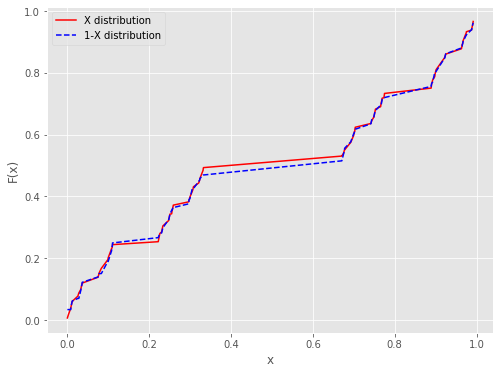

In [10]:
n = 100; eps = 1e-3 / 2
X_emp, F_emp = g_d.cantrnd(n)
I = np.argsort(X_emp)
F_emp = F_emp[I]
X_emp = X_emp[I]

Y_emp = 1 - X_emp
idx = np.argmin(np.abs(X_emp - Y_emp.reshape(-1, 1)), axis=1)
G_emp = 1 - F_emp[idx]

#  visualize
plt.figure(figsize=(8, 6))
plt.plot(X_emp, F_emp, 'r', label='X distribution')
plt.plot(X_emp, G_emp, 'b--', label='1-X distribution')
plt.legend()
plt.xlabel('x'); plt.ylabel('F(x)');

E = sum(X_emp) / len(X_emp)
D = sum((X_emp - E)**2) / len(X_emp)
print('expectation is {:.4f}, dispersion is {:.4f}'.format(E, D));

In [11]:
def smirnovcriterion(X1, X2, alpha):
    n = len(X1); m = len(X2)
    prob1 = 1./n; prob2 = 1./m
    X1_with_prob = np.array([(x, prob1) for x in X1])
    X2_with_prob = np.array([(x, -prob2) for x in X2])
    diff_F = np.array(sorted(np.vstack((X1_with_prob, X2_with_prob)), key=lambda s:s[0]))[:, 1]
    diff_F = np.cumsum(diff_F)
    
    D_n_m = max(abs(diff_F))
#     print(D_n_m)

    K_alpha = np.sqrt(-np.log(alpha/2) / 2)
    reject = (n * m / (n + m)) * (D_n_m ** 2) > K_alpha ** 2;
    return reject


### Self-similarity

not enought proof to reject hypothesis


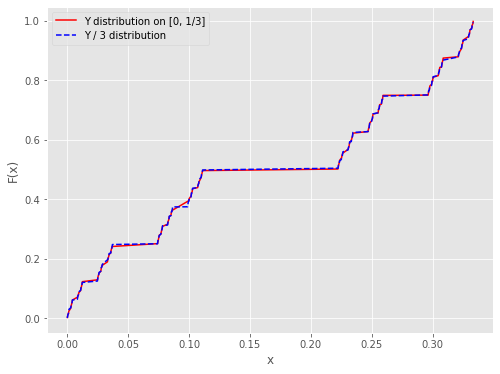

In [12]:
n = 500;
X_emp, F_emp = g_d.cantrnd(n)

#  Y \in [0, 1/3]
idx = np.where(X_emp < 1/3)[0]
G1_emp = F_emp[idx] * 2
I = np.argsort(X_emp[idx])
Y_emp = X_emp[idx][I]
G1_emp = G1_emp[I]

Y_emp1 = X_emp / 3
G2_emp = F_emp
I = np.argsort(Y_emp1)
Y_emp1 = Y_emp1[I]
G2_emp = G2_emp[I]

# visualize
plt.figure(figsize=(8, 6))
plt.plot(Y_emp, G1_emp, 'r', label='Y distribution on [0, 1/3]')
plt.plot(Y_emp1, G2_emp, 'b--', label='Y / 3 distribution')
plt.legend()
plt.xlabel('x'); plt.ylabel('F(x)');


if smirnovcriterion(Y_emp, Y_emp1, 0.05):
    print('reject hypothesis')
else:
    print('not enought proof to reject hypothesis')

## Task 2.3

### Mean and variance convergence

In [46]:
n_list = [100, 500, 1000, 1500, 10000]
E = []
D = []
eps = 1e-3 / 2
n_iter = 100
for n in n_list:
    E_ = 0
    D_ = 0
    for it in range(n_iter):
        X_emp, F_emp = g_d.cantrnd(n)
        E_cur = sum(X_emp) / len(X_emp)
        E_ += E_cur
        D_ += sum(((X_emp - E_cur)**2)) / len(X_emp)
    E.append(E_ / n_iter)
    D.append(D_ / n_iter)
print('expectation is ', E)
print('dispersion is ', D);

expectation is  [0.5011197695282257, 0.5001791606600954, 0.5000197739773152, 0.5007462949087534, 0.49914702655604803]
dispersion is  [0.12487427571187705, 0.12473419502200837, 0.1250085197031655, 0.12492374054563696, 0.12498780954645584]


C:\Users\Polina\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


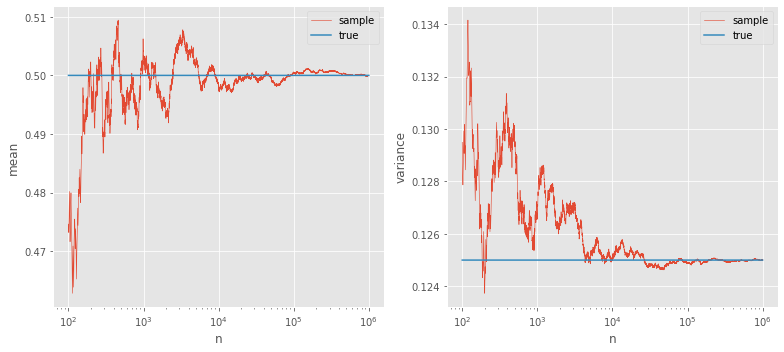

In [78]:
n_min = 10**2
n_max = 10**6
n_list = np.arange(n_min, n_max, dtype='int64')

X_emp = np.array(g_d.cantrnd(n_max))
n_mean = np.cumsum(X_emp)[n_list] / n_list
n_var = (np.cumsum(X_emp**2))[n_list] / n_list - n_mean**2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))

ax1.plot(n_list, n_mean, lw = 0.6, label='sample')
ax1.plot(n_list, 0.5 * np.ones(len(n_list)), label='true')
ax1.legend()
ax1.set_xlabel('n')
ax1.set_ylabel('mean')
ax1.set_xscale("log")

ax2.plot(n_list, n_var, lw = 0.6, label='sample')
ax2.plot(n_list, 0.125 * np.ones(len(n_list)), label='true')
ax2.legend()
ax2.set_xlabel('n')
ax2.set_ylabel('variance')
ax2.set_xscale("log")

fig.tight_layout()

# Task 3 Exponential distribution

## Task 3.1

Экспоненциальное распредение

https://ru.wikipedia.org/wiki/%D0%AD%D0%BA%D1%81%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%86%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5



inverse transform sampling:

U ~ U[0, 1]   $---->   F^{-1}(U)$

$P(F^{-1}(U) < x) = P(U < F(x)) = F(x)$

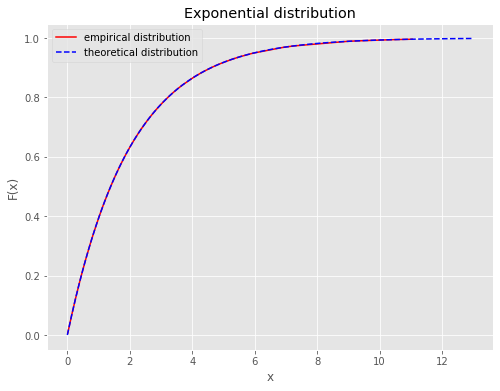

In [81]:
n = 200
alpha = 0.5

X_emp, F_emp = g_c.exprnd(alpha, n)
I = np.argsort(X_emp)
X_emp = X_emp[I]; F_emp = F_emp[I]

F_th_max = 0.999
quantile = int(-np.log(1 - F_th_max) / alpha)
# print(quantile)
X_th = np.linspace(0, quantile, 100)
F_th = 1 - np.exp(-alpha * X_th)

# visualize
plt.figure(figsize=(8, 6))
plt.plot(X_emp, F_emp, 'r', label='empirical distribution')
plt.plot(X_th, F_th, 'b--', label='theoretical distribution')
plt.legend()
plt.title('Exponential distribution')
plt.xlabel('x'); plt.ylabel('F(x)');

Свойство отсутствия памяти

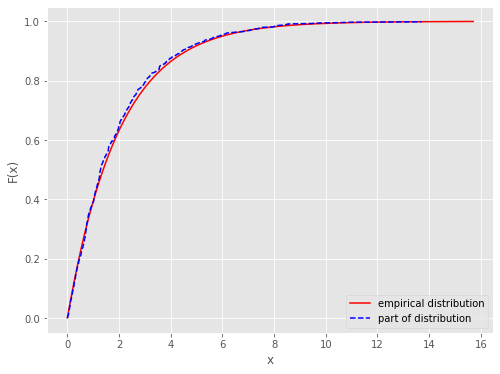

In [14]:
n = 2000
alpha = 0.5

X_emp, F_emp = g_c.exprnd(alpha, n)
I = np.argsort(X_emp)
X_emp = X_emp[I]; F_emp = F_emp[I]

m = 2
I = np.where(X_emp > m)[0]
X_emp_part = X_emp[I]
n = len(X_emp_part)
F_emp_part = np.arange(n) / n

# visualize
plt.figure(figsize=(8, 6))
plt.plot(X_emp, F_emp, 'r', label='empirical distribution')
plt.plot(X_emp_part - m, F_emp_part, 'b--', label='part of distribution')
plt.legend()
plt.xlabel('x'); plt.ylabel('F(x)');

Распределение $Y = \min(Exp(\lambda_1), Exp(\lambda_2), ...) = Exp(\lambda_1 + \lambda_2 + ...)$

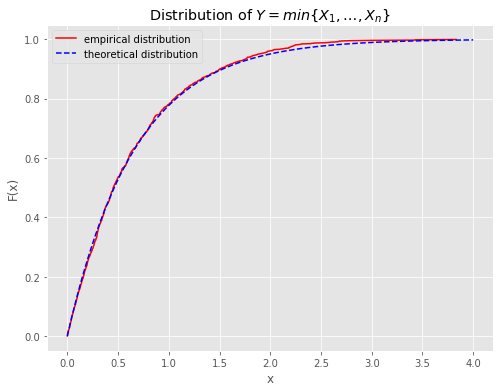

In [85]:
alphas = np.linspace(0.1, 0.5, 5)
niter = 1000
Y = np.empty(niter)
for i in range(niter):
    Y[i] = np.min([g_c.exprnd(alpha)[0] for alpha in alphas])

Y = np.sort(Y)
F_emp = np.arange(niter) / niter

alpha_new = sum(alphas)
F_th_max = 0.999
quantile = int(-np.log(1 - F_th_max) / alpha_new)
# print(quantile)
X_th = np.linspace(0, quantile, 100)
F_th = 1 - np.exp(-alpha_new * X_th)
# visualize
plt.figure(figsize=(8, 6))
plt.plot(Y, F_emp, 'r', label='empirical distribution')
plt.plot(X_th, F_th, 'b--', label='theoretical distribution')
plt.legend()
plt.title(r'Distribution of $Y = min\{X_1,\ldots,X_n\}$')
plt.xlabel('x'); plt.ylabel('F(x)');

## Task 3.2 Poisson distribution from Exponential

Распределение Пуассона

https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9F%D1%83%D0%B0%D1%81%D1%81%D0%BE%D0%BD%D0%B0

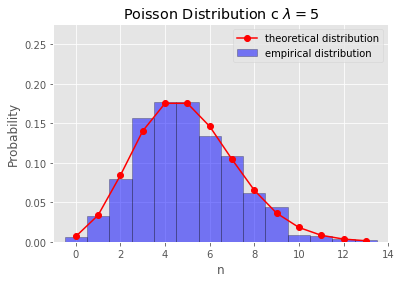

In [94]:
niter = int(1e3)
rate = 5
exp_pow = np.exp(-rate)

X = g_d.poisrnd(rate, niter)
xmax = int(max(X))
P_th = np.hstack((1, np.cumprod(rate / np.arange(1, xmax)))) * exp_pow
edges = np.linspace(-0.5, xmax-0.5, xmax+1)

plt.hist(X, bins=edges, density=True, 
         color='blue', edgecolor='black', alpha=0.5, label='empirical distribution')
plt.plot(np.arange(xmax), P_th, 'r-o', label='theoretical distribution')
plt.legend()
plt.title(r'Poisson Distribution с $\lambda=$'+str(rate))
plt.xlabel('n'); plt.ylabel('Probability');
plt.xlim([-1, xmax])
plt.ylim([0, max(P_th) + 0.1]);


## Task 3.3 Poisson distribution as the limit of Binomial

In [92]:
def poisrnd_bin(rate, n, niter=1000):
    niter = int(niter)
    res = [g_d.binrnd(niter, rate / niter) for i in range(n)]
    return res

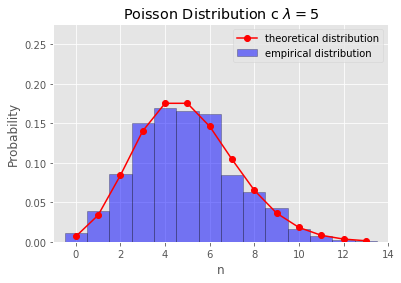

In [95]:
n = int(1e3)
rate = 5
exp_pow = np.exp(-rate)

X = poisrnd_bin(rate, n)
xmax = int(max(X))
P_th = np.hstack((1, np.cumprod(rate / np.arange(1, xmax+1)))) * exp_pow

edges = np.linspace(-0.5, xmax+0.5, xmax+2)

plt.hist(X, bins=edges, density=True, 
         color='blue', edgecolor='black', alpha=0.5, label='empirical distribution')
plt.plot(np.arange(xmax+1), P_th, 'r-o', label='theoretical distribution')
plt.legend()
plt.title(r'Poisson Distribution с $\lambda=$'+str(rate))
plt.xlabel('n'); plt.ylabel('Probability');
plt.xlim([-1, xmax+1])
plt.ylim([0, max(P_th) + 0.1]);


### Проверка датчика распределения Пуассона с помощью критерия хи-квадрат Пирсона
критерий согласия Пирсона, простая гипотеза (знаем параметр)

http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D1%85%D0%B8-%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82#.D0.9F.D1.80.D0.B8.D0.BC.D0.B5.D1.80_2
    
степеней свободы k-1 (при k интервалов)

In [21]:
from scipy.stats import chi2

In [22]:
n_list = np.linspace(100, 3000, 10)
hi_2_list = []
# degrees of freedom
df_list = []
pp_list = []
rate = 5
exp_pow = np.exp(-rate)

alpha = 0.95
for n in n_list:
    X = poisrnd_bin(rate, int(n))
    xmax = int(max(X))
    P_th = np.hstack((1, np.cumprod(rate / np.arange(1, xmax+1)))) * exp_pow

    edges = np.linspace(-0.5, xmax+0.5, xmax+2)
    N,_ = np.histogram(X, bins=edges)
    P_emp = N / n

    hi_2 = n * np.sum(((P_emp - P_th) ** 2) / P_th)
    hi_2_list.append(hi_2)
    
    df = (xmax+1) - 1
    df_list.append(df)
    pp_list.append(chi2.ppf(alpha, df))



In [23]:
hi_2_list

[32.09239097532824,
 7.775273846908333,
 12.973454519142766,
 29.619779113491386,
 5.658367641697544,
 39.951787322698195,
 37.668187011829126,
 18.43557022107539,
 34.39718704951768,
 9.443399110331596]

In [24]:
pp_list

[23.684791304840576,
 21.02606981748307,
 22.362032494826934,
 26.29622760486423,
 22.362032494826934,
 26.29622760486423,
 27.58711163827534,
 22.362032494826934,
 26.29622760486423,
 24.995790139728616]

In [25]:
df_list

[14, 12, 13, 16, 13, 16, 17, 13, 16, 15]

## Task 3.4

### Normal distribution 

Датчик распределения методом моделирования случайных величин парами с переходом в полярные координаты

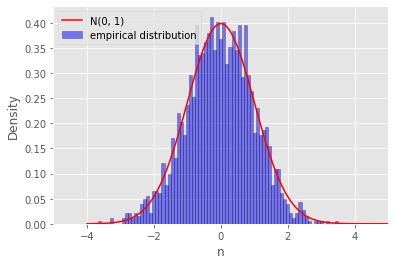

In [31]:
X_emp = g_c.N_polarrnd(1000)
X_emp = np.append(X_emp[0], X_emp[1])

# 4 * sigma
xmax = 4

X = np.linspace(-xmax, xmax+1, 100)
P_th = 1. / np.sqrt(2 * np.pi) * np.exp(-X ** 2 / 2)

edges = np.linspace(-xmax-0.5, xmax+0.5, 100)
plt.hist(X_emp, bins=edges, density=True, 
         color='blue', edgecolor='black', alpha=0.5, label='empirical distribution')
plt.plot(X, P_th, 'r', label='N(0, 1)')
plt.legend()
plt.xlabel('n'); plt.ylabel('Density');
plt.xlim([-5, 5]);

### Проверка равенства МО при помощи t-критерия Стъюдента
Сравнение двух выборочных средних при неизвестных равных дисперсиях :http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D0%A1%D1%82%D1%8C%D1%8E%D0%B4%D0%B5%D0%BD%D1%82%D0%B0

Проверка гипотез:
http://www.machinelearning.ru/wiki/index.php?title=%D0%9F%D1%80%D0%BE%D0%B2%D0%B5%D1%80%D0%BA%D0%B0_%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D1%85_%D0%B3%D0%B8%D0%BF%D0%BE%D1%82%D0%B5%D0%B7

In [93]:
from scipy.stats import t, f

In [73]:
def T_test(X, Y, alpha=0.05):
    n = len(X)
    X_mean = sum(X) / n
    X_var = sum((X - X_mean) ** 2) / (n - 1)
    
    m = len(Y)
    Y_mean = sum(Y) / m
    Y_var = sum((Y - Y_mean) ** 2) / (m - 1)
    
    s = np.sqrt(((n - 1) * X_var + (n - 1) * Y_var) / (m + n - 2))
    
    T = (X_mean - Y_mean) / s * np.sqrt(m * n / (m + n))
    
    p_val = 2 * min(t.cdf(T, m+n-2), 1 - t.cdf(T, m+n-2))
    print(p_val)
    return p_val < alpha 

In [91]:
X_emp = N_polarrnd(10)
if T_test(X_emp[0], X_emp[1]):
    print('reject H0')
else:
    print('not enough evidence to reject')

0.9476384581465704
not enough evidence to reject


### Проверка равенства дисперсий при помощи критерия Фишера

Критерий Фишера: http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0

In [100]:
def F_test(X, Y, alpha=0.05):
    n = len(X)
    X_mean = sum(X) / n
    X_var = sum((X - X_mean) ** 2) / (n - 1)
    
    m = len(Y)
    Y_mean = sum(Y) / m
    Y_var = sum((Y - Y_mean) ** 2) / (m - 1)
    
    F = max(X_var, Y_var) / min(X_var, Y_var)
    p_val = 2 * min(f.cdf(F, n-1, m-1), 1 - f.cdf(F, n-1, m-1))
    print(p_val)
    return p_val < alpha 

In [107]:
X_emp = N_polarrnd(10)
if F_test(X_emp[0], X_emp[1]):
    print('reject H0')
else:
    print('not enough evidence to reject')

0.8864330159974823
not enough evidence to reject


# Task 4 Cauchy distribution


## Task 4.1
Распределение Коши

https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9A%D0%BE%D1%88%D0%B8

7.313751514675031


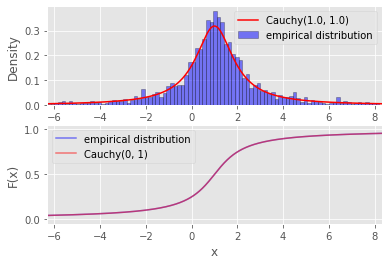

In [109]:
n = 2000
a = 1.; b = 1.

X_emp, F_emp = g_c.cauchy_rnd(a, b, n)
I = np.argsort(X_emp)
X_emp = X_emp[I]
F_emp = F_emp[I]


F_th_max = 0.95
quantile = a + b * np.tan(np.pi * (F_th_max - 0.5))
print(quantile)
X = np.linspace(-quantile + a, quantile+1 + a, 1000)
P_th = b / np.pi / ((X - a) ** 2 + b ** 2)
F_th = np.arctan((X - a) / b) / np.pi + 0.5

plt.subplot(211)
edges = np.linspace(-quantile + a, quantile+1 + a, 100)
plt.hist(X_emp, bins=edges, density=True, 
         color='blue', edgecolor='black', alpha=0.5, label='empirical distribution')
plt.plot(X, P_th, 'r', label='Cauchy({}, {})'.format(a, b))
plt.legend()
plt.xlabel('x'); plt.ylabel('Density');
plt.xlim([-quantile + a, quantile + a]);

plt.subplot(212)
edges = np.linspace(-quantile + a, quantile+1 + a, 2000)
plt.plot(X_emp, F_emp, 
         color='blue', alpha=0.5, label='empirical distribution')
plt.plot(X, F_th, 'r', alpha=0.5, label='Cauchy(0, 1)')
plt.legend()
plt.xlabel('x'); plt.ylabel('F(x)');
plt.xlim([-quantile + a, quantile + a]);

## Task 4.2

На основе датчика распределения Коши с помощью метода фон Неймана построить датчик стандартного нормального распределения.

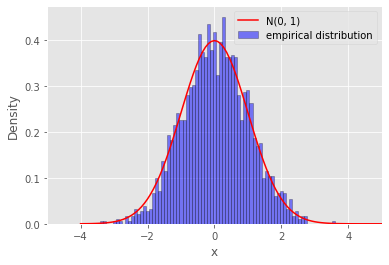

In [64]:
n = 2000
X_emp = N01rnd(n)

# 4 * sigma
xmax = 4
X = np.linspace(-xmax, xmax+1, 100)
P_th = 1. / np.sqrt(2 * np.pi) * np.exp(-X ** 2 / 2)

edges = np.linspace(-xmax-0.5, xmax+0.5, 100)
plt.hist(X_emp, bins=edges, density=True, 
         color='blue', edgecolor='black', alpha=0.5, label='empirical distribution')
plt.plot(X, P_th, 'r', label='N(0, 1)')
plt.legend()
plt.xlabel('x'); plt.ylabel('Density');
plt.xlim([-5, 5]);

### Проверка корректности работы датчика

In [36]:
# Calculate quantiles for a probability plot, and optionally show the plot.
from scipy.stats import probplot

In [44]:
from scipy.stats import norm

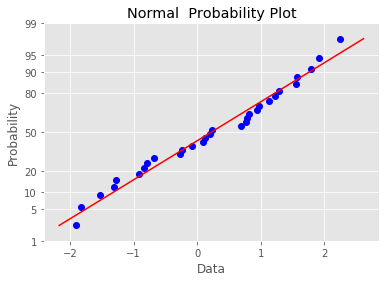

In [54]:
n = 30
X_emp = N01rnd(n)
(quantiles, values), (slope, intercept, r) = probplot(X_emp,
                                                      dist='norm')

#plot results
plt.plot(values, quantiles,'ob')
plt.plot(quantiles * slope + intercept, quantiles, 'r')

#define ticks
ticks_perc=[1, 5, 10, 20, 50, 80, 90, 95, 99]

#transfrom them from precentile to cumulative density
ticks_quan=[norm.ppf(i/100.) for i in ticks_perc]

#assign new ticks
plt.yticks(ticks_quan,ticks_perc)

plt.xlabel('Data'); plt.ylabel('Probability')
plt.title('Normal  Probability Plot');

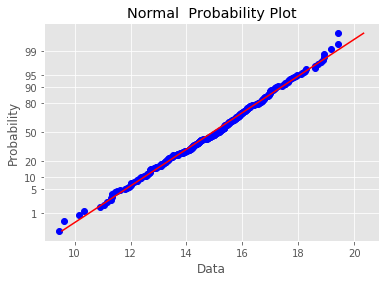

In [59]:
# Инвариантность к масштабу и сдвигу

n = 300
X_emp = 2 * N01rnd(n) + 15
(quantiles, values), (slope, intercept, r) = probplot(X_emp,
                                                      dist='norm')

#plot results
plt.plot(values, quantiles,'ob')
plt.plot(quantiles * slope + intercept, quantiles, 'r')

#define ticks
ticks_perc=[1, 5, 10, 20, 50, 80, 90, 95, 99]

#transfrom them from precentile to cumulative density
ticks_quan=[norm.ppf(i/100.) for i in ticks_perc]

#assign new ticks
plt.yticks(ticks_quan,ticks_perc)

plt.xlabel('Data'); plt.ylabel('Probability')
plt.title('Normal  Probability Plot');

## Task 4.3

Сравнение скорости работы


In [6]:
k = 10
n_list = np.linspace(100, 1000, k)
polar_times = []
cauchy_times = []

niter = 100
for n in n_list:
    
    # т к моделируется в 2 раза больше
    n1 = n / 2
    cur_time = 0.
    for i in range(niter):
        start = time.clock()
        X = g_c.N_polarrnd(n1)
        t = time.clock() - start
        cur_time += t
    polar_times.append(cur_time / niter)
    
    cur_time = 0.
    for i in range(niter):
        start = time.clock()
        X = g_c.N01rnd(n)
        t = time.clock() - start
        cur_time += t
    cauchy_times.append(cur_time / niter)

C:\Users\Polina\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  del sys.path[0]
C:\Users\Polina\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  from ipykernel import kernelapp as app
C:\Users\Polina\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\Polina\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


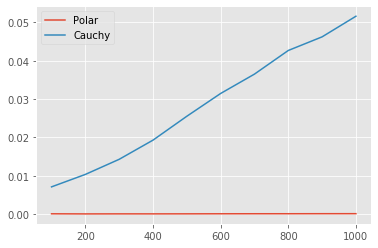

In [7]:
plt.plot(n_list, polar_times, label='Polar')
plt.plot(n_list, cauchy_times , label='Cauchy')
plt.legend()

# Task 5

## Task 5.1

## ЗБЧ 
($X_n$ одинаково распределены и не коррелируют): $\dfrac{S_n}{n} -> \mu$

http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%BA%D0%BE%D0%BD_%D0%B1%D0%BE%D0%BB%D1%8C%D1%88%D0%B8%D1%85_%D1%87%D0%B8%D1%81%D0%B5%D0%BB

https://ru.wikipedia.org/wiki/%D0%97%D0%B0%D0%BA%D0%BE%D0%BD_%D0%B1%D0%BE%D0%BB%D1%8C%D1%88%D0%B8%D1%85_%D1%87%D0%B8%D1%81%D0%B5%D0%BB

Text(0, 0.5, '$\\dfrac{S_n}{n}$')

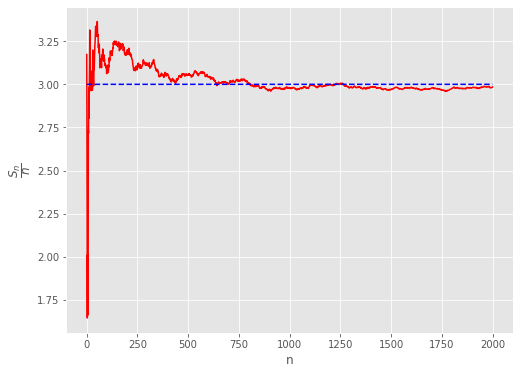

In [104]:
n = 2000

mu = 3.; sigma = 2.
X_emp = sigma * g_c.N01rnd(n) + mu

Xn = np.cumsum(X_emp) / np.arange(1, n+1)

plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, n+1), Xn, c='r')
plt.plot(np.arange(1, n+1), mu * np.ones_like(Xn), 'b--')
plt.xlabel('n')
plt.ylabel('$\dfrac{S_n}{n}$')

## ЦПТ:

$X_n$ норсв: $\dfrac{S_n - \mu n}{\sigma \sqrt{n}} -> N(0, 1)$

$\sqrt{n}(\dfrac{S_n}{n} - \mu) -> N(0, \sigma^2)$

https://ru.wikipedia.org/wiki/%D0%A6%D0%B5%D0%BD%D1%82%D1%80%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D1%82%D0%B5%D0%BE%D1%80%D0%B5%D0%BC%D0%B0#%D0%A6%D0%9F%D0%A2_%D0%B4%D0%BB%D1%8F_%D0%BC%D0%B0%D1%80%D1%82%D0%B8%D0%BD%D0%B3%D0%B0%D0%BB%D0%BE%D0%B2

Сходимся по распределению, поэтому сгенерили выборку из статистик и посмотрели на распределение

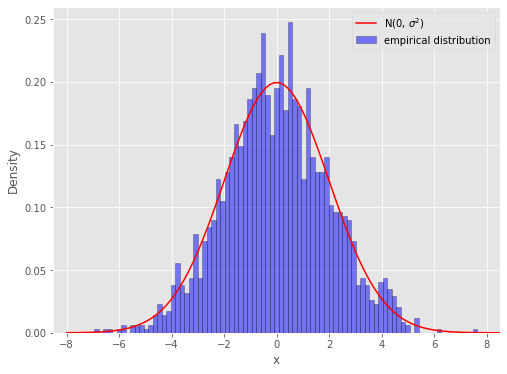

In [74]:
niter = 2000
Yn = np.empty(niter)
mu = 3.; sigma = 2.

for i in range(niter):
    n = 200
    X = sigma * g_c.N01rnd(n) + mu
    Yn[i] = (sum(X) / n - mu) * np.sqrt(n)
    

# 4 * sigma
xmax = 4 * sigma

X = np.linspace(-xmax, xmax+1, 100)
P_th = np.exp(-X ** 2 / (2 * sigma**2)) / (sigma * np.sqrt(2 * np.pi))

plt.figure(figsize=(8, 6))
edges = np.linspace(-xmax-0.5, xmax+0.5, 100)
plt.hist(Yn, bins=edges, density=True, 
         color='blue', edgecolor='black', alpha=0.5, label='empirical distribution')
plt.plot(X, P_th, 'r', label='N(0, $\sigma^2$)')
plt.legend()
plt.xlabel('x'); plt.ylabel('Density');
plt.xlim([-xmax-0.5, xmax+0.5]);

## Task 5.2
## Доверительные интервалы для среднего и дисперсии

In [6]:
from scipy.stats import t, chi2

C:\Users\Polina\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


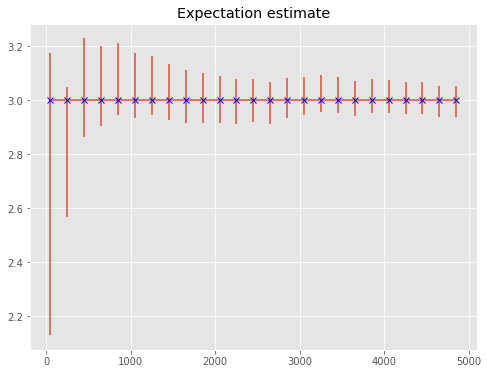

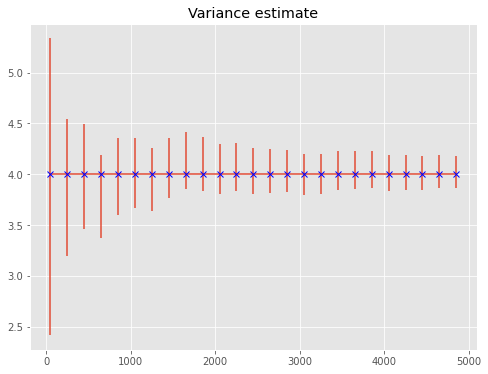

In [95]:
n = 5000
alpha = 0.05

mu = 3.; sigma = 2.
# mu = 0.; sigma = 1.
X_emp = sigma * g_c.N01rnd(n) + mu
Sn = np.cumsum(X_emp)
N = np.arange(1, n+1)
Xn = Sn / N
Sigma_estim = np.sqrt(np.cumsum((X_emp - Xn) ** 2) / (N-1))

# отрежем начало
k = 50; step=200
Sn = Sn[k::step]; N = N[k::step]; Xn = Xn[k::step]; Sigma_estim = Sigma_estim[k::step]

E_left = Xn - Sigma_estim / np.sqrt(N) * t.ppf(1 - alpha / 2, N-1)
E_right = Xn + Sigma_estim / np.sqrt(N) * t.ppf(1 - alpha / 2, N-1)

D_left = (N-1) * (Sigma_estim ** 2) / chi2.ppf(1 - alpha / 2, N-1)
D_right = (N-1) * (Sigma_estim ** 2) / chi2.ppf(alpha / 2, N-1)

plt.figure(figsize=(8, 6))
plt.errorbar(N, mu * np.ones(len(E_right)), yerr=np.vstack((mu-E_left, E_right-mu)),
             mec='b', marker='x', mfc='r')
plt.title('Expectation estimate');

plt.figure(figsize=(8, 6))
plt.errorbar(N, (sigma**2) * np.ones(len(D_right)), yerr=np.vstack((sigma**2-D_left, D_right-sigma**2)),
             mec='b', marker='x', mfc='r')
plt.title('Variance estimate');

## Task 5.3
### Устойчивость


Распределение Коши является сдвиг-масштабным распределением:  
Пусть $X \sim C(0, 1)$, тогда $Y = aX+b \sim C(a,b)$


Распределение Коши устойчиво:  
$X_i \sim C(a, b)$

$\frac{1}{n} \sum_{i=1}^n X_n \sim C(a, b)$

In [105]:
# # very strange
# # DON"T DO SO

# n = 2000
# a = 1.; b = 2.
# X_emp, _ = g_c.cauchy_rnd(a, b, n)
# Yn = np.cumsum(X_emp) / np.arange(1, n+1)
    

# F_th_max = 0.95
# quantile = a + b * np.tan(np.pi * (F_th_max - 0.5))
# X = np.linspace(-quantile + a, quantile+1 + a, 100)
# P_th = b / np.pi / ((X - a) ** 2 + b ** 2)

# plt.figure(figsize=(8, 6))
# edges = np.linspace(-quantile + a, quantile+1 + a, 100)
# plt.hist(Yn, bins=edges, density=True, 
#          color='blue', edgecolor='black', alpha=0.5, label='empirical distribution')
# plt.plot(X, P_th, 'r', label='Cauchy({}, {})'.format(a, b))
# plt.plot([X_emp[0], X_emp[0]], [0, 0.2], 'black')
# plt.legend()
# plt.xlabel('x'); plt.ylabel('Density');
# plt.xlim([-quantile + a, quantile + a]);

13.627503029350063


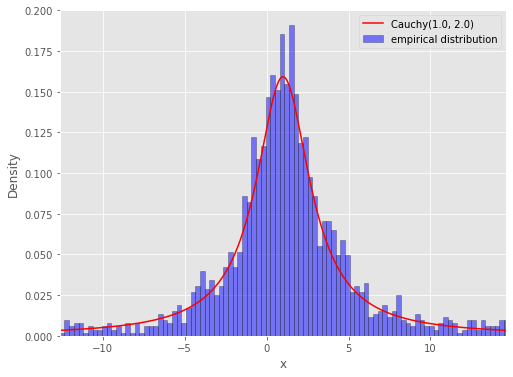

In [152]:
niter = 2000
Yn = np.empty(niter)
a = 1.; b = 2.

for i in range(niter):
    n = 200
    X_emp, _ = g_c.cauchy_rnd(a, b, n)
    Yn[i] = np.sum(X_emp) / n
    

F_th_max = 0.95
quantile = a + b * np.tan(np.pi * (F_th_max - 0.5))
print(quantile)
X = np.linspace(-quantile, quantile+1, 1000)
P_th = b / np.pi / ((X - a) ** 2 + b ** 2)

plt.figure(figsize=(8, 6))
edges = np.linspace(-quantile + a, quantile+1 + a, 100)
plt.hist(Yn, bins=edges, density=True, 
         color='blue', edgecolor='black', alpha=0.5, label='empirical distribution')
plt.plot(X, P_th, 'r', label='Cauchy({}, {})'.format(a, b))
plt.legend()
plt.xlabel('x'); plt.ylabel('Density');
plt.xlim([-quantile + a, quantile + a]);

# Task 6 Подсчет интеграла


Посчитать интеграл $I = \int\limits_{-\infty}^{+\infty}\dots\int\limits_{-\infty}^{+\infty} \dfrac{\exp(-(x_1^2+\dots+x_{10}^2+\dfrac{1}{2^7 x_1^2\dots x_{10}^2}))}{x_1^2\dots x_{10}^2} dx_1\dots dx_{10}$

## Task 6.1 Метод Монте-Карло

Представим интеграл как математическое ожидание от функции по вектору $X = (x_1,\dots,x_{10})$, где $x_i \sim N(0, \dfrac{1}{2})$ независимые одинаково распределенные случайные величины, тогда $$p(X) = \dfrac{1}{\pi^5}\exp(-(x_1^2+\dots+x_{10}^2))$$
$$I = \int \pi^5 \dfrac{\exp\biggl(-\dfrac{1}{2^7 x_1^2\dots x_{10}^2}\biggr)}{x_1^2\dots x_{10}^2} p(X) dX = \mathbb{E}_X f(X), \ где$$  
$$f(X) = \pi^5 \dfrac{\exp\biggl(-\dfrac{1}{2^7 x_1^2\dots x_{10}^2}\biggr)}{x_1^2\dots x_{10}^2}$$

\
В силу ЗБЧ $\dfrac{S_n}{n} = \dfrac{1}{n} \sum\limits_{k=1}^n f(X_k)  \longrightarrow \mathbb{E}_X f(X)$ при $n \rightarrow \infty$

Сгенерируем выборки разного размера и посчитаем интеграл 10 раз для каждого значения n:

In [67]:
# %%time
# n_size = 6
# n_list = np.logspace(3, 8, n_size, dtype='int64')
n_size = 2
n_list = [10**5, 10**6]
# print(n_list)
eps = 1e-8
I = np.zeros((n_size, 10))
sigma = np.zeros((n_size, 10))
times = np.zeros((n_size, 10))

C_1 = -1./2**7
C_2 = np.pi ** 5
# for i, n in enumerate(n_list):
for i in tqdm(range(n_size)):
    n = n_list[i]
    for it in tqdm(range(10)): 
        start = time()
        for exp in range(n):
            X = g_c.N_polarrnd(5) / np.sqrt(2)
            X = np.prod(X)**2
            if X > eps:
                X = 1/X
                f = X * np.exp(C_1*X)
                I[i, it] += f
                sigma[i, it] += f**2
        times[i, it] = time() - start
    I[i, :] /= n
I *= C_2
sigma *= C_2 ** 2


In [78]:
I_all = pd.DataFrame(
    columns=np.hstack((['I'+str(i) for i in range(10)], ['times'+str(i) for i in range(10)])),
    data=np.hstack((I, times))
    )
I_all['n'] = n_list

In [79]:
I

array([[125.76724156, 125.23725539, 118.18551514, 127.31303066,
        124.48164294, 127.32202853, 126.72982813, 119.27214168,
        124.30919505, 117.47390431],
       [123.80798419, 124.67145692, 123.47136072, 123.37522844,
        125.31124155, 124.36221752, 125.64610198, 123.46996388,
        120.6854182 , 125.21535682]])

In [80]:
I_all

,I0,I1,I2,I3,I4,I5,I6,I7,I8,I9,...,times1,times2,times3,times4,times5,times6,times7,times8,times9,n
0,125.767242,125.237255,118.185515,127.313031,124.481643,127.322029,126.729828,119.272142,124.309195,117.473904,...,44.256562,43.473271,43.690093,40.846810,39.392258,40.031183,37.847526,40.612641,42.178651,100000
1,123.807984,124.671457,123.471361,123.375228,125.311242,124.362218,125.646102,123.469964,120.685418,125.215357,...,73.155483,82.239265,81.742959,84.187052,91.142751,87.724404,96.188870,88.074011,92.072853,1000000


In [83]:
I_all[I_all.columns[:10]].mean(1)

0    123.609178
1    124.001633
dtype: float64

Оценим точность вычислений метода с помощью неравенства Чебышева:  
$\mathbb{P} \biggl(\biggl|\dfrac{S_n}{n} - I\biggr| \geq \varepsilon \biggr) = \mathbb{P} \biggl(\biggl|\dfrac{1}{n} \sum\limits_{k=1}^n f(X_k) - \mathbb{E}_Xf(X)\biggr| \geq \varepsilon \biggr) \leq \dfrac{\mathbb{D}f(X)}{n \varepsilon^2}= \alpha $  
Тогда если мы хотим $\alpha = 0.05$, то получим погрешность $\varepsilon = \sqrt{\dfrac{\mathbb{D}f(X)}{n \alpha}} $. Но дисперсию мы не знаем, и можем посчитать только выборочную:  
$\mathbb{D}f(X) =  \dfrac{1}{n} \sum\limits_{k=1}^n f^2(X_k) - \biggl(\dfrac{1}{n}\sum\limits_{k=1}^n f(X_k)\biggr)^2$

## Task 6.2 Метод квадратур
Чтобы посчитать интеграл методом прямоугольников, перейдем от интеграла на прямых к интегралу по отрезкам $[-\dfrac{\pi}{2},\dfrac{\pi}{2}]$, для этого сделаем замену $x_i = \tan[t_i]$, где $t_i \in [-\dfrac{\pi}{2},\dfrac{\pi}{2}]$; $dx_i = \dfrac{1}{\cos^2(t_i)}dt_i, \ i = 1, \dots, 10$

Тогда интеграл примет вид (2 равенство из симметричности):  
$$I = \int\limits_{-\dfrac{\pi}{2}}^{+\dfrac{\pi}{2}}\dots\int\limits_{-\dfrac{\pi}{2}}^{+\dfrac{\pi}{2}} \dfrac{\exp\biggl(-(\sum\limits_{k=1}^N \tan^2[t_i]+\dfrac{1}{2^7 \prod\limits_{k=1}^N \tan^2[t_i]})\biggr)}{\prod\limits_{k=1}^N \tan^2[t_i]\cos^2[t_i]} dt_1\dots dt_{10} = 2^{10} \int\limits_{0}^{+\dfrac{\pi}{2}}\dots\int\limits_{0}^{+\dfrac{\pi}{2}} \dfrac{\exp\biggl(-(\sum\limits_{k=1}^N \tan^2[t_i]+\dfrac{1}{2^7 \prod\limits_{k=1}^N \tan^2[t_i]})\biggr)}{\prod\limits_{k=1}^N \tan^2[t_i]\cos^2[t_i]} dt_1\dots dt_{10}$$

Обозначим подынтегральную функцию $f$. Рассмотрим разбиение куба 10-мерной сеткой. Разобьем каждый отрезок $[0,\dfrac{\pi}{2}]$ на N частей, шаг сетки будет равен $h = \dfrac{\pi}{N}$, и на каждом отрезке возьмем его центральную точку $y_j$ для подсчета интеграла, то есть каждое $y_i$ будет принимать значения:  
$$y_j = h(j+0.5), \ j = 0,\dots,N-1, \ i = 1,\dots,10$$

Тогда интеграл аппроксимируется величиной:
$$ I_N = (2h)^{10} \sum\limits_{i_1=0}^{N-1} \dots \sum\limits_{i_{10}=0}^{N-1} f(y_{i_1},\dots, y_{i_{10}})$$


Заметим, что интеграл не меняется при перестановке переменных, значит его можно упростить как:  
$$ I_N = (2h)^{10} \sum\limits_{0 \leq i_1 \leq \dots  \leq i_{10} \leq N-1} \dfrac{10!}{n_{0}!\dots n_{N-1}!} f(y_{i_1},\dots, y_{i_{10}})$$,     
где $n_{j}$ сколько чисел из $y_{i_1},\dots, y_{i_{10}}$ равны $0,\dots, N-1$ (в сумме 10)

In [28]:
def fun_func(t):
    tan_2 = np.tan(t)**2
    return np.exp(-sum(tan_2) - 1 / np.prod(tan_2) / 128) / np.prod(np.sin(t))**2

# возвращает следующую неубывающую последовательность
# сколько будет каждого шага сетки (каждое из 10 значений 0 <= y_i < N-1)
def next_i(s, N): 
    for i in range(-1, -len(s) - 1, -1):
        if s[i] < N - 1:
            s[i:] = s[i] + 1
            return s
    s[0] = -1
    return s

In [33]:
N = 12
h = np.pi / N / 2
x = h * (np.arange(0, N) + 0.5)

start = time()
ij = np.zeros(10, dtype=int)
I = 0
while ij[0] != -1:
    num_ij = np.zeros(N, dtype=int)
    for i in range(N):
        num_ij[i] = sum(ij == i)
#     print(ij)
#     print(num_ij)
    I += math.factorial(10) / np.prod([math.factorial(x) for x in num_ij]) * fun_func(x[ij])
    ij = next_i(ij, N)
I *= (2*h)**10
print('I = ', I)
print('Computation time:', time() - start)

I =  124.98912846401925
Computation time: 688.3192276954651


Значения интегралов близки